# Zadanie 2

Korzystając z danych boston, przeprowadź analogiczną analizę - wybierz trzy najbardziej skorelowane zmienne objaśniające z targetem, a następnie zbuduj na nich model regresji liniowej. Sprawdź wyniki pomiaru błędu predykcji

# Przygotowanie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression # Klasa modelu regrsji liniowej
from sklearn.model_selection import train_test_split # Dzieli dane na testowe i treningowe
from sklearn.metrics import mean_squared_error # Oblicza MSE 
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
data_values = data['data']
data_target = data['target']
target_name = data['target_names'][0]
columns = data['feature_names']
data_description = data['DESCR']

target_series = pd.Series(data_target, name=target_name)
target_series

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [3]:
print(data_description)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
df = pd.DataFrame(data_values, columns=columns)
df[target_name] = data_target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print(f"Czy w dataframie znajdują się puste wartości: {df.isna().values.any()}")
print(f"Wymiary df rzędy: {df.shape[0]}, kolumny: {df.shape[1]}")
print(f"Nazwy atrybutów: {df.columns.to_list()}")
print(f"Wartość wyjściowa: {target_name}")

Czy w dataframie znajdują się puste wartości: False
Wymiary df rzędy: 20640, kolumny: 9
Nazwy atrybutów: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
Wartość wyjściowa: MedHouseVal


In [6]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


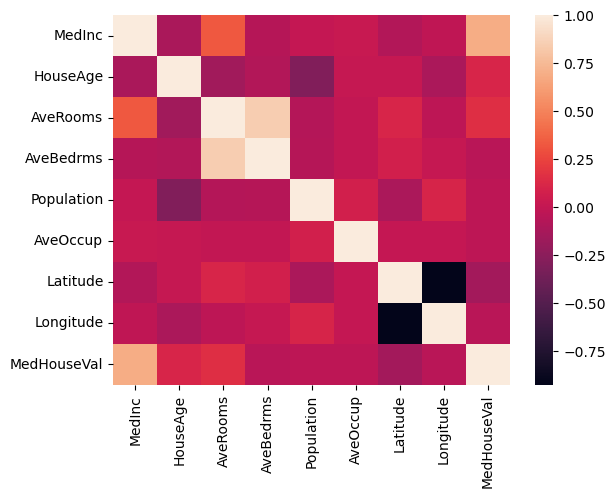

In [7]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index)
plt.show()
plt.close()

# Silne korelacje:
# AveBedrms + AveRooms - Dodatni -> Najprawdopodobniej problem z współliniowością ang. multicollinearity
# AveRooms + Medlnc - Dodatni -> ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Słabe korelacje:
# Latitude + Longitude - Ujemny
# Population + HouseAge - Ujemny

# Trenowanie modelu

### Model ze wszystkimi atrybutami

In [8]:
dataset = df.iloc[:,:-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset, df['MedHouseVal'], test_size=0.2, random_state=0)
all_attr_model = LinearRegression()
all_attr_model.fit(X_train, y_train)

all_attr_pred = all_attr_model.predict(X_test)
all_attr_rscr = all_attr_model.score(X_test, y_test)
all_attr_mse = mean_squared_error(all_attr_pred, y_test)

print(f"Model ze wszystkimi atrybutami \nR^2: {all_attr_rscr}\nMSE: {all_attr_mse}")

Model ze wszystkimi atrybutami 
R^2: 0.5943232652466188
MSE: 0.5289841670367227


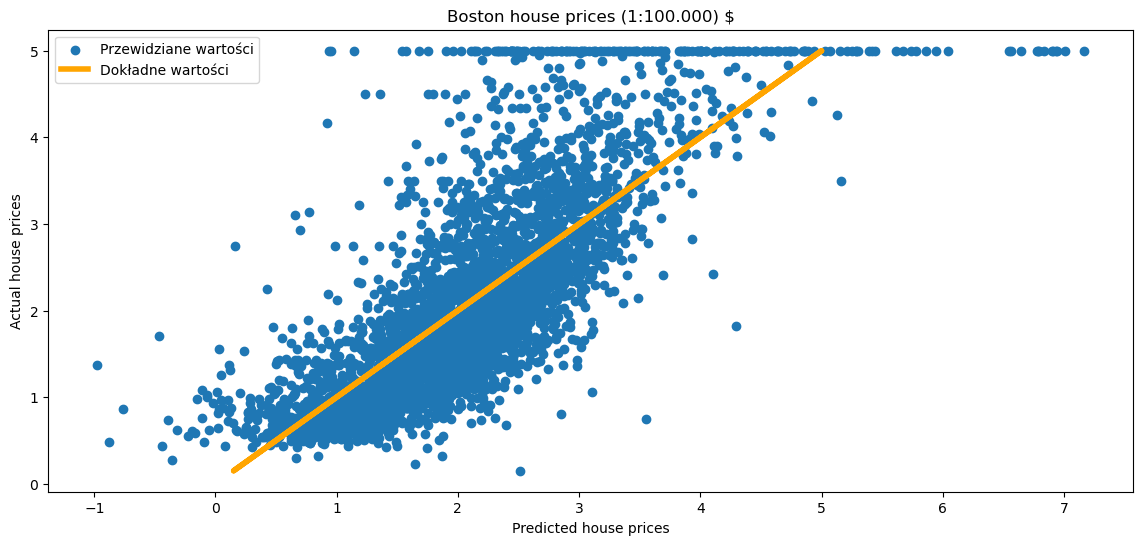

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.scatter(all_attr_pred, y_test, label='Przewidziane wartości')
ax.plot(y_test, y_test, color='orange', linewidth=4, label='Dokładne wartości')
ax.set_title('Boston house prices (1:100.000) $')
ax.set_xlabel('Predicted house prices')
ax.set_ylabel('Actual house prices')

ax.legend()

plt.show()
plt.close()

np.float64(-36.85856910680122)

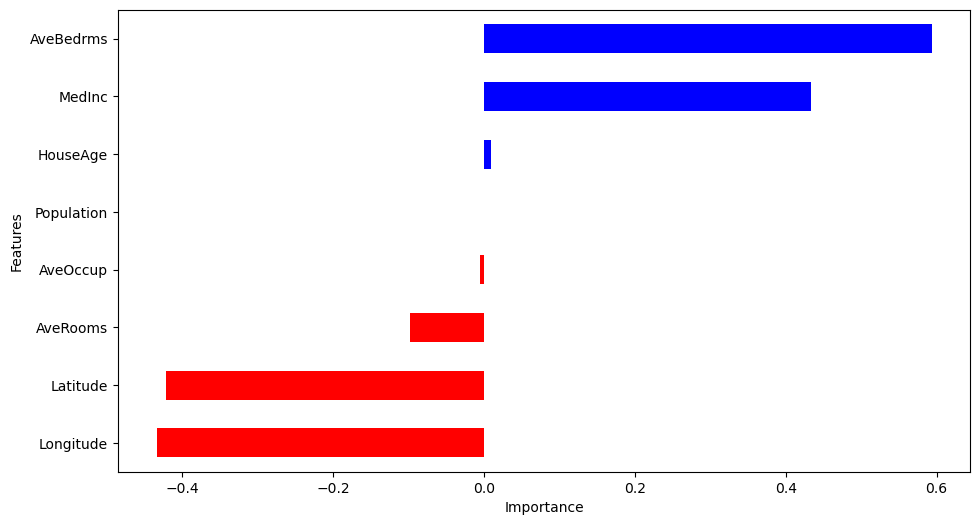

In [11]:
coeff = all_attr_model.coef_
labels = list(dataset.columns)

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = list(coeff)
features.sort_values(by='importance', ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh', figsize=(11, 6), color=features.positive.map({True:'Blue', False:'Red'}))
plt.xlabel('Importance')

all_attr_model.intercept_

### Model - 3 wybrane atrybuty

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['MedInc', 'AveRooms', 'HouseAge']], df['MedHouseVal'], test_size=0.2, random_state=0)

adv_model = LinearRegression()
adv_model.fit(X_train, y_train)
adv_model_rscr = adv_model.score(X_test, y_test)

adv_model_predicted = adv_model.predict(X_test)
adv_model_mse = mean_squared_error(adv_model_predicted, y_test)
print(f"Model z 3 wybranymi atrybutami \nR^2: {adv_model_rscr}\nMSE: {adv_model_mse}")

Model z 3 wybranymi atrybutami 
R^2: 0.4882522385579553
MSE: 0.6672960022809671


Atrybuty z średnimi zarobkami, średnią ilością pokoi oraz wiekiem domu uzyskują znaczoąco niższe wynik niż w przypadku użycia wszystkich zmiennych. Atrybut MedInc silnie wpływa na jakość wyniku natomiast AveRooms oraz HouseAge nie wykazują już tak silnego wpływu.

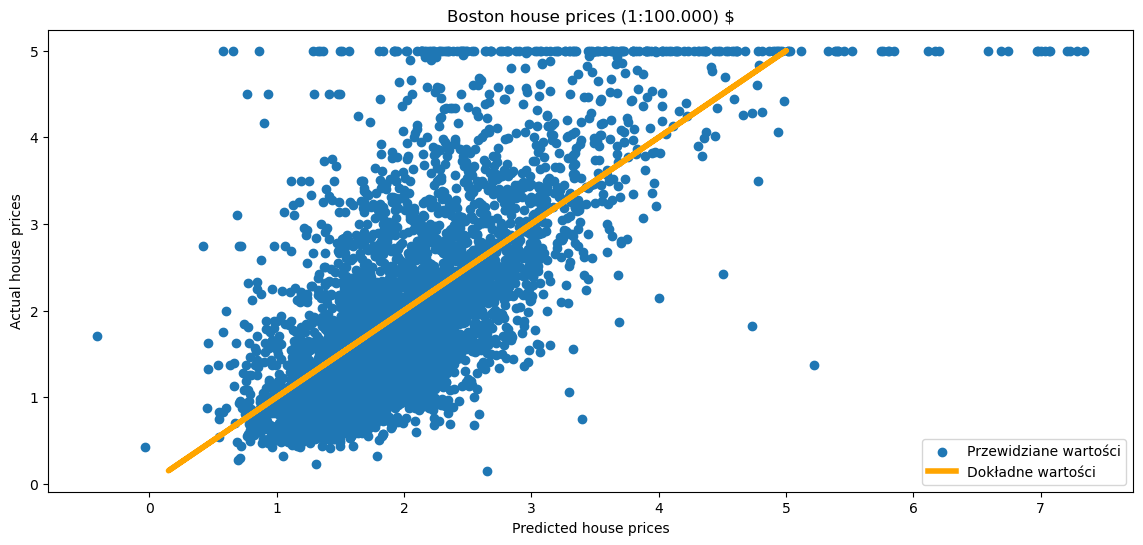

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.scatter(adv_model_predicted, y_test, label='Przewidziane wartości')
ax.plot(y_test, y_test, color='orange', linewidth=4, label='Dokładne wartości')
ax.set_title('Boston house prices (1:100.000) $')
ax.set_xlabel('Predicted house prices')
ax.set_ylabel('Actual house prices')

ax.legend()

plt.show()
plt.close()

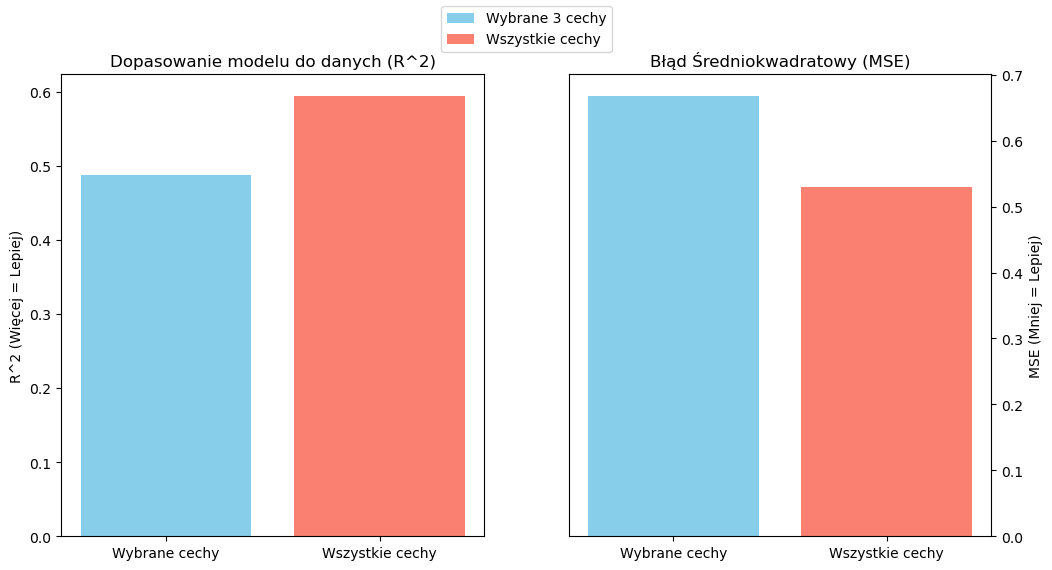

In [14]:
df_compare = pd.DataFrame([[adv_model_rscr, adv_model_mse], [all_attr_rscr, all_attr_mse]], columns=['R^2', 'MSE'], index=['Wybrane cechy', 'Wszystkie cechy'])
colors = ['skyblue', 'salmon']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1 = axes[0].bar(df_compare.index, df_compare['R^2'], color=colors)
axes[0].set_title('Dopasowanie modelu do danych (R^2)')
axes[0].set_ylabel('R^2 (Więcej = Lepiej)')

axes[1].bar(df_compare.index, df_compare['MSE'], color=colors)
axes[1].set_title('Błąd Średniokwadratowy (MSE)')
axes[1].set_ylabel('MSE (Mniej = Lepiej)')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()


fig.legend([ax1[0], ax1[1]], ['Wybrane 3 cechy', 'Wszystkie cechy'], loc='upper center')
plt.show()
plt.close()